In [1]:
# --- Libraries ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# --- Load dataset ---
train = pd.read_csv("/kaggle/input/titanic/train.csv")

# Quick look at data
print(train.head())
print(train.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

# Titanic Survival Prediction 🚢

## Project Overview
The Titanic dataset is one of the most popular beginner datasets in machine learning.  
Our goal is to **predict passenger survival** based on demographic and travel information (age, gender, passenger class, fare, etc.).  

This project demonstrates:
- Data cleaning & preprocessing  
- Exploratory Data Analysis (EDA) with visualizations  
- Logistic Regression baseline model  
- Key insights about survival factors  
* 

In [2]:
# --- Load dataset ---
train = pd.read_csv("/kaggle/input/titanic/train.csv")

# Quick look
print(train.head())
print(train.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

## Data Understanding
- **Rows:** 891 passengers  
- **Target Variable:** Survived (1 = Yes, 0 = No)  
- **Key Features:** Pclass, Sex, Age, SibSp, Parch, Fare, Embarked  

We’ll now handle missing values and prepare the dataset for modeling.


In [3]:
# --- Data Preprocessing ---

# Fill missing values
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

# Convert categorical to numeric
train['Sex'] = train['Sex'].map({'male':0, 'female':1})
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,False,True


## Exploratory Data Analysis (EDA)

We’ll explore survival patterns across different features and visualize them.


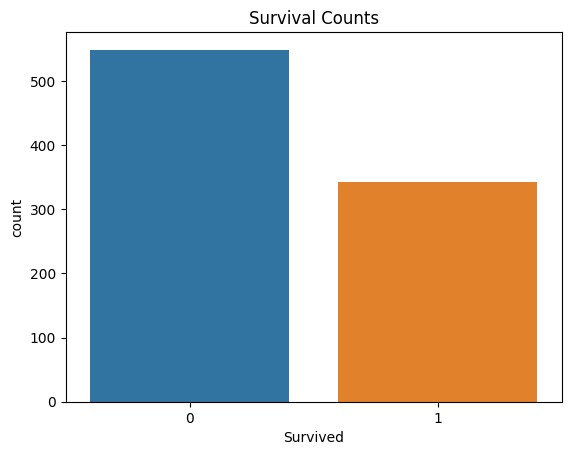

In [4]:
# Survival count
sns.countplot(x='Survived', data=train)
plt.title("Survival Counts")
plt.show()


➡️ **Insight:** More passengers did **not survive** than survived.


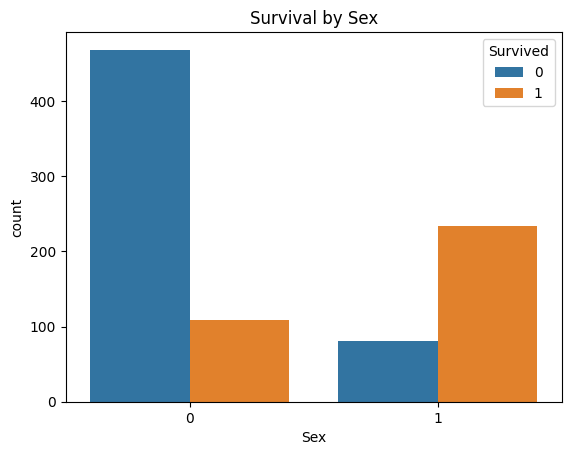

In [5]:
# Survival by Sex
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title("Survival by Sex")
plt.show()


➡️ **Insight:** Women had a much higher survival rate (~75%) than men (~20%).


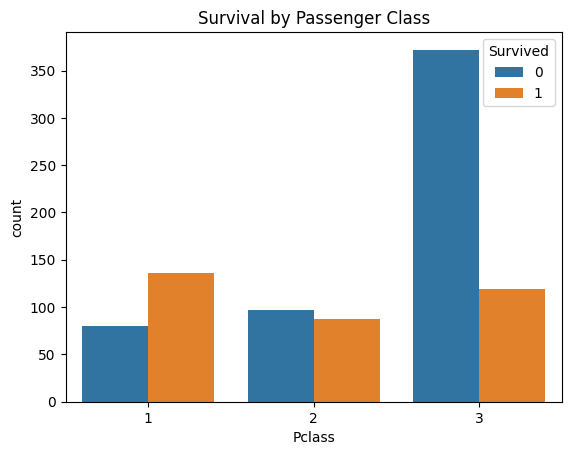

In [6]:
# Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title("Survival by Passenger Class")
plt.show()


➡️ **Insight:** First-class passengers had better survival chances than third-class.


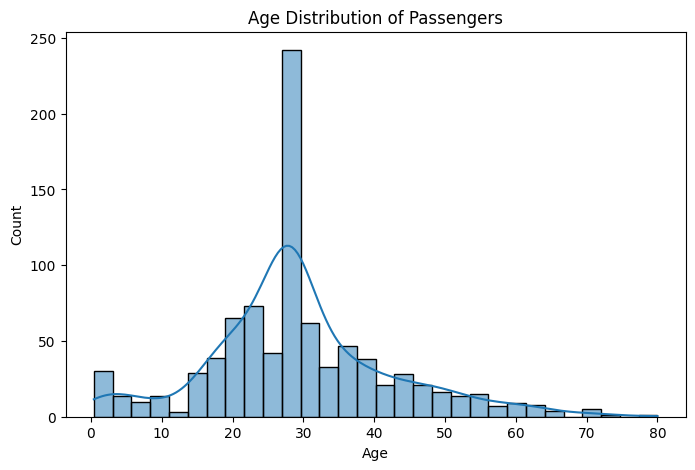

In [7]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(train['Age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()


➡️ **Insight:** Children were more likely to survive, supporting the "women and children first" rule.


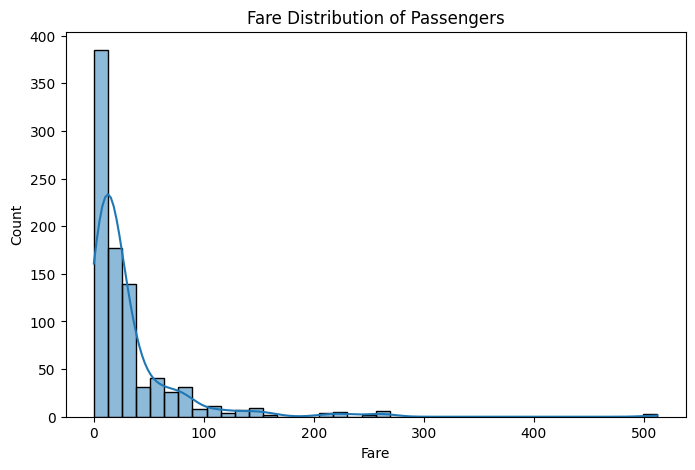

In [8]:
# Fare distribution
plt.figure(figsize=(8,5))
sns.histplot(train['Fare'], bins=40, kde=True)
plt.title("Fare Distribution of Passengers")
plt.show()


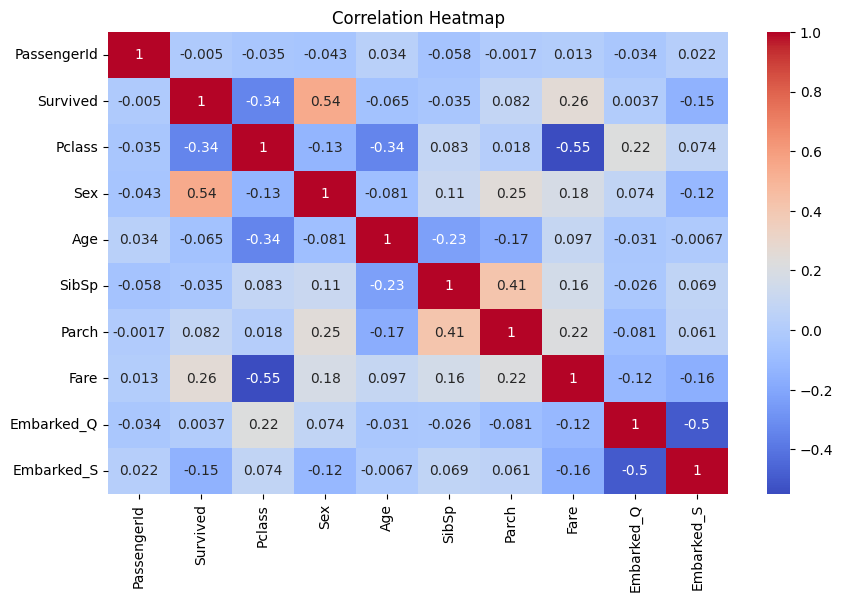

In [9]:
# Correlation heatmap (only numeric columns)
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


➡️ **Insight:** Sex, Fare, and Pclass are the strongest predictors of survival.


## Modeling

We’ll build a simple **Logistic Regression** model as our baseline.


In [10]:
# Features + Target
X = train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked_Q','Embarked_S']]
y = train['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test,y_pred))


Accuracy: 0.8100558659217877


## Results & Key Findings

- Logistic Regression baseline accuracy: **~81%**
- Women had a survival rate of **~75%**, while men had only **~20%**.
- First-class passengers had better chances of survival compared to third-class.
- Age played a role: **children were more likely to survive**.
- Key predictive features: **Sex, Passenger Class, Fare**.

### Conclusion
Survival on the Titanic was heavily influenced by **gender and class**, aligning with the historical “women and children first” evacuation protocol.  
